<a href="https://colab.research.google.com/github/ChandaSourav/Lens-Solver/blob/main/lens_chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,674 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [3]:
pip install --upgrade openai easyocr pytesseract pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfu

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openai
import cv2
import re
from PIL import Image, ImageOps
import pytesseract
import pyttsx3
import os

from pytesseract import Output

import warnings
warnings.filterwarnings("ignore")

In [5]:
#we have to work with this so, uncomment it before using the code

#itr = int(input("Enter the number of searches you want to perform : "))

In [6]:
# Set up the OpenAI API client
f = open("/content/drive/MyDrive/Key/key.txt",'r',encoding="utf8")
key = f.read()
openai.api_key = key

In [7]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


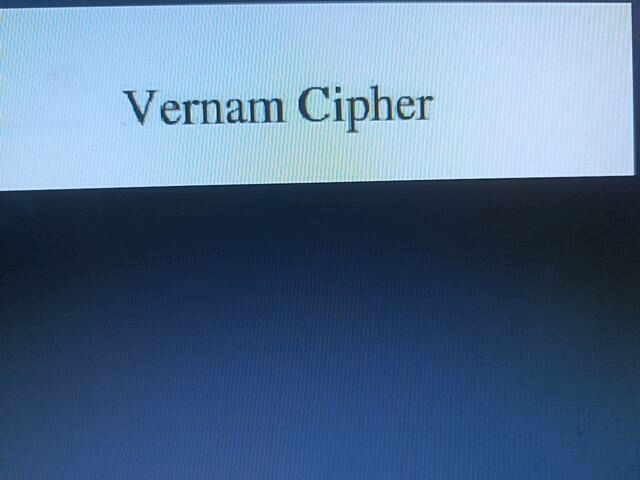

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

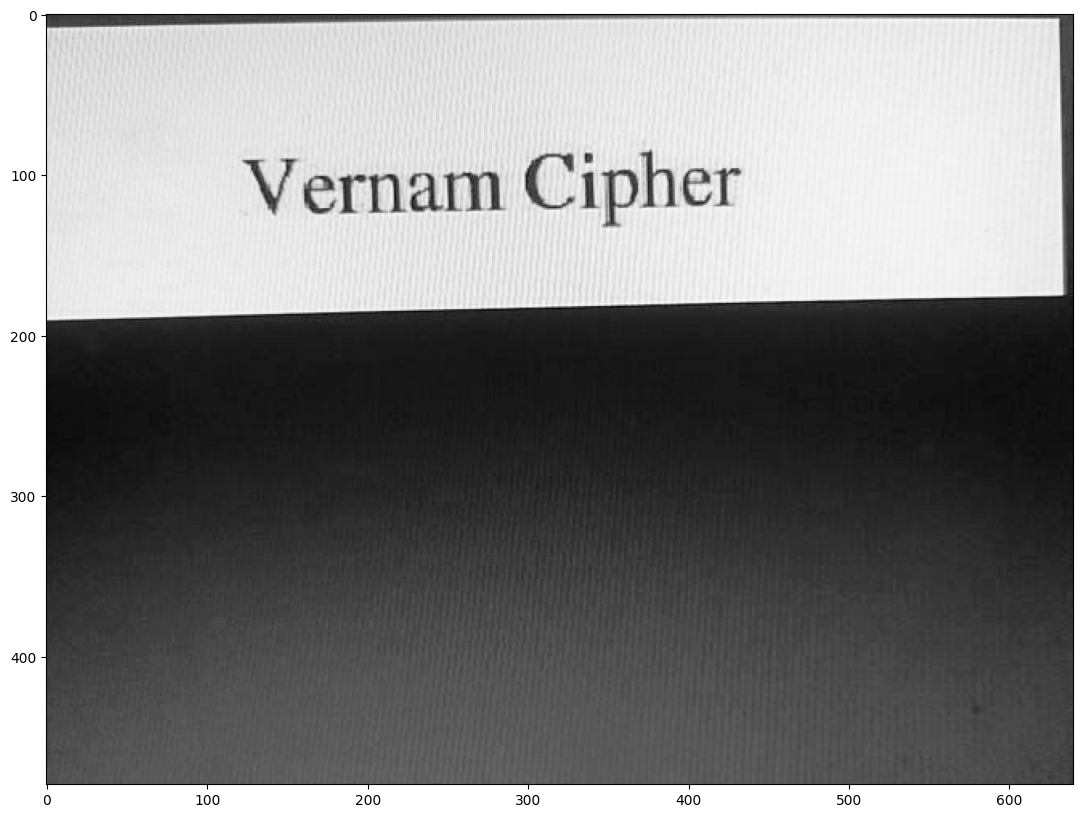

In [21]:
file_name = "/content/photo.jpg"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
#image = cv2.flip(image, 1)
plot_gray(image)

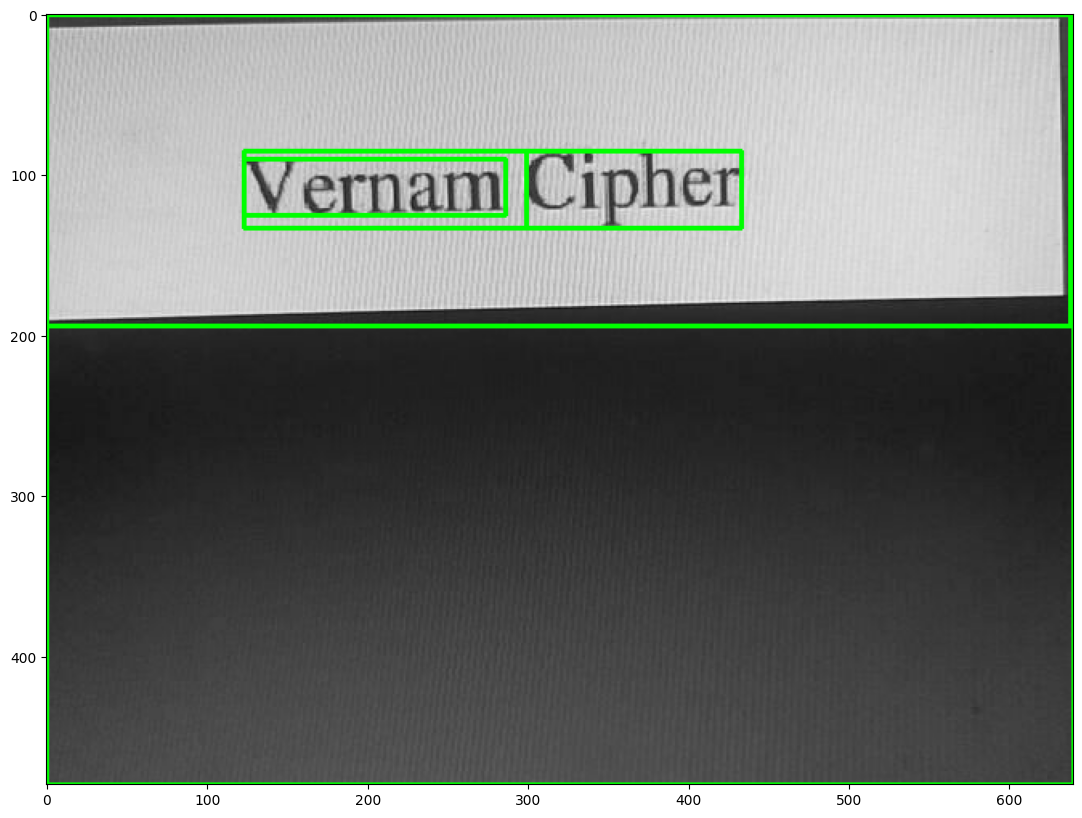

In [22]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

In [23]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

Vernam Cipher

 



In [24]:
messages = []

itr = 1
while itr:
    #message = input("You: ")
    message = "what is rail-fence cipher"
    
    if message:
        messages.append({"role": "user", "content": extracted_text},)
        chat_completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=messages)
    answer = chat_completion.choices[0].message.content
    answer = answer.replace("OpenAI", "Subhajeet & Sourav")
    print(f"Stella : {answer}")
    messages.append({"role": "assistant", "content": answer})
    itr -= 1

Stella : The Vernam cipher, also known as the one-time pad, is a cryptographic technique that uses a random and secret key to encrypt messages. It is a symmetric encryption algorithm, meaning the same key is used for both encryption and decryption.

To use the Vernam cipher, the key must be at least as long as the message to be encrypted. The key is combined with the message using an exclusive-OR (XOR) operation. The resulting ciphertext can only be decrypted using the same key, making it impossible for anyone without the key to determine the original message.

The strength of the Vernam cipher lies in the randomness and secrecy of the key. If the key is truly random and kept secret, the cipher is unbreakable, as there are an infinite number of possible keys that could have been used to encrypt the message.

However, if the key is not truly random or is compromised in any way, the cipher becomes susceptible to attacks. Additionally, the key can only be used once, hence the name "one-ti

In [14]:
'''engine = pyttsx3.init()
engine.say(answer)
engine.runAndWait()'''

'engine = pyttsx3.init()\nengine.say(answer)\nengine.runAndWait()'